# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data


In [61]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

Dataframe shape

In [ ]:
df_tesla.shape

(124, 3)

Dataframe columns

In [ ]:
df_tesla.columns, df_tesla.dtypes

(Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object'),
 MONTH               object
 TSLA_WEB_SEARCH      int64
 TSLA_USD_CLOSE     float64
 dtype: object)

In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


The periodicity of the time series data

In [ ]:
df_tesla['MONTH']

0      2010-06-01
1      2010-07-01
2      2010-08-01
3      2010-09-01
4      2010-10-01
          ...    
119    2020-05-01
120    2020-06-01
121    2020-07-01
122    2020-08-01
123    2020-09-01
Name: MONTH, Length: 124, dtype: object

In [ ]:
df_tesla[df_tesla.TSLA_WEB_SEARCH==2], df_tesla[df_tesla.TSLA_WEB_SEARCH==31]

(         MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
 2   2010-08-01                2           3.896
 3   2010-09-01                2           4.082
 4   2010-10-01                2           4.368
 5   2010-11-01                2           7.066
 6   2010-12-01                2           5.326
 8   2011-02-01                2           4.778
 11  2011-05-01                2           6.028
 12  2011-06-01                2           5.826
 13  2011-07-01                2           5.634
 14  2011-08-01                2           4.948
 15  2011-09-01                2           4.878
 17  2011-11-01                2           6.548
 18  2011-12-01                2           5.712
 19  2012-01-01                2           5.814,
           MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
 123  2020-09-01               31      407.339996)

What does a value of 100 in the Google Trend search popularity actually mean?

In [ ]:
df_tesla.loc[100]

MONTH              2018-10-01
TSLA_WEB_SEARCH            14
TSLA_USD_CLOSE      67.463997
Name: 100, dtype: object

### Unemployment Data

In [ ]:
df_unemployment.shape

(181, 3)

In [ ]:
df_unemployment.columns, df_unemployment.dtypes

(Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object'),
 MONTH                      object
 UE_BENEFITS_WEB_SEARCH      int64
 UNRATE                    float64
 dtype: object)

In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [ ]:
df_unemployment[df_unemployment.UE_BENEFITS_WEB_SEARCH==100]

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
61,2009-02,100,8.3


### Bitcoin

In [ ]:
df_btc_search.shape

(73, 2)

In [ ]:
df_btc_search.columns, df_btc_search.dtypes

(Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object'),
 MONTH              object
 BTC_NEWS_SEARCH     int64
 dtype: object)

In [ ]:
df_btc_price.shape

(2204, 3)

In [ ]:
df_btc_price.columns, df_btc_price.dtypes

(Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object'),
 DATE       object
 CLOSE     float64
 VOLUME    float64
 dtype: object)

In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


In [ ]:
df_btc_search[df_btc_search.BTC_NEWS_SEARCH==100]

,MONTH,BTC_NEWS_SEARCH
39,2017-12,100


In [ ]:
df_btc_price[df_btc_price.DATE.str.contains('2017-12')]

,DATE,CLOSE,VOLUME
1171,2017-12-01,10975.599609,6.783120e+09
1172,2017-12-02,11074.599609,5.138500e+09
1173,2017-12-03,11323.200195,6.608310e+09
1174,2017-12-04,11657.200195,6.132410e+09
1175,2017-12-05,11916.700195,6.895260e+09
1176,2017-12-06,14291.500000,1.265630e+10
1177,2017-12-07,17899.699219,1.795070e+10
1178,2017-12-08,16569.400391,2.113600e+10
1179,2017-12-09,15178.200195,1.391130e+10
1180,2017-12-10,15455.400391,1.343330e+10


# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [ ]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


Remove missing values

In [ ]:
df_btc_price[df_btc_price.CLOSE.isna()]
df_btc_price.dropna(inplace=True)
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: False


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [30]:
type(df_tesla.MONTH[0]), type(df_unemployment.MONTH[0]), type(df_btc_search.MONTH[0]), type(df_btc_price.DATE[0])

(str, str, str, str)

In [62]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [36]:
type(df_tesla.MONTH[0]), type(df_unemployment.MONTH[0]), type(df_btc_search.MONTH[0]), type(df_btc_price.DATE[0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

### Converting from Daily to Monthly Data


In [76]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
...,...,...
2020-05-31,9263.151745,4.149575e+10
2020-06-30,9489.227214,2.169711e+10
2020-07-31,9589.899729,1.760688e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

### Tesla Stock Price v.s. Search Volume

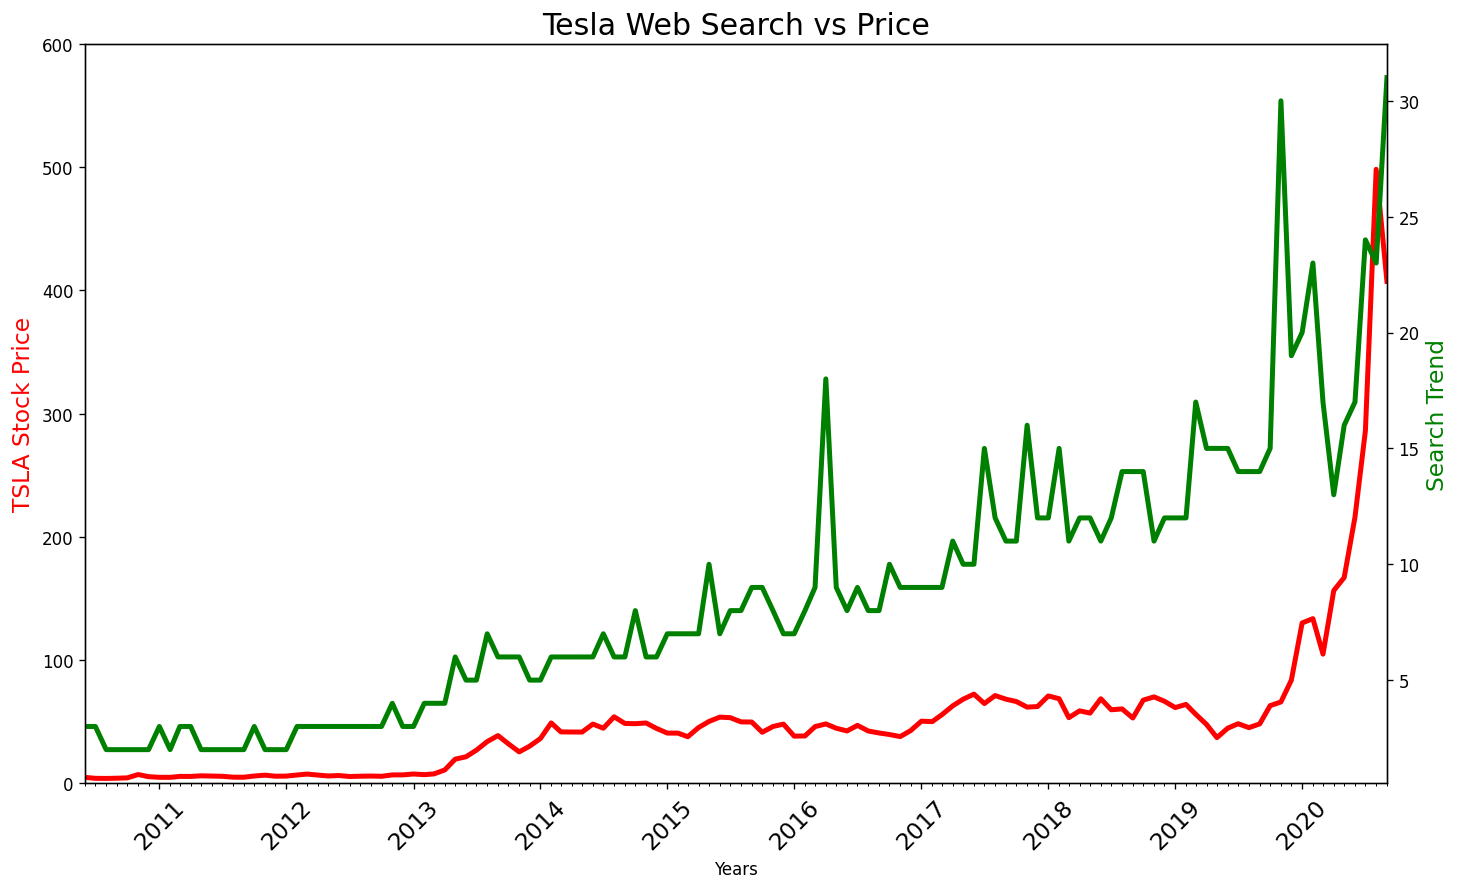

In [100]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='red', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='green', linewidth=3)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.set_ylabel('TSLA Stock Price', color='red', fontsize=14)
ax2.set_ylabel('Search Trend', color='green', fontsize=14)
ax1.set_xlabel('Years')

#Tick Marks on a Time Line

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

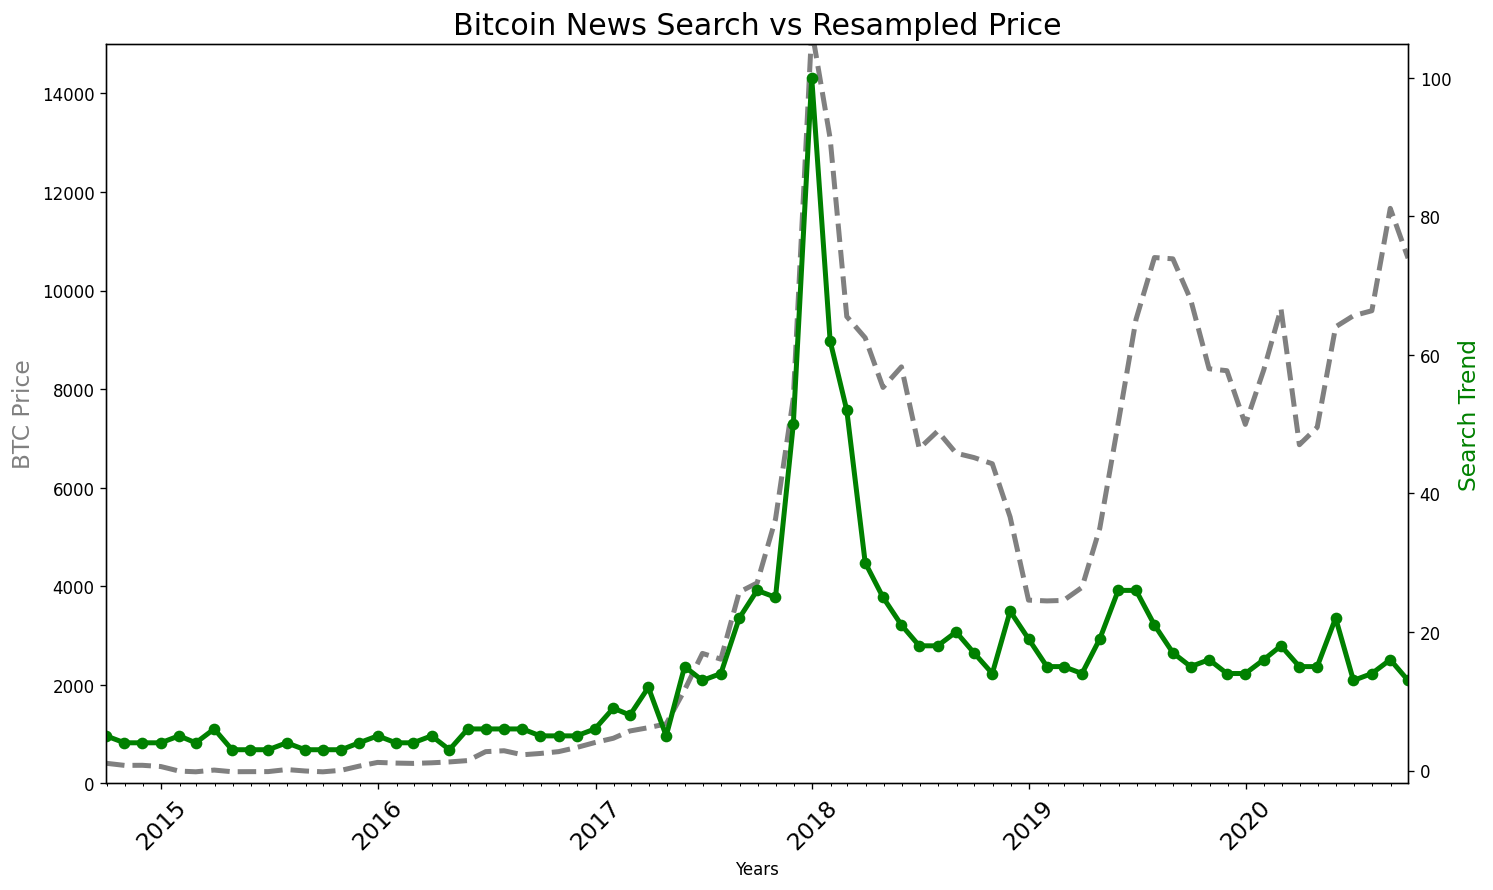

In [108]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='grey', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='green', linewidth=3, marker='o')

ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.set_ylabel('BTC Price', color='grey', fontsize=14)
ax2.set_ylabel('Search Trend', color='green', fontsize=14)
ax1.set_xlabel('Years')

#Tick Marks on a Time Line

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

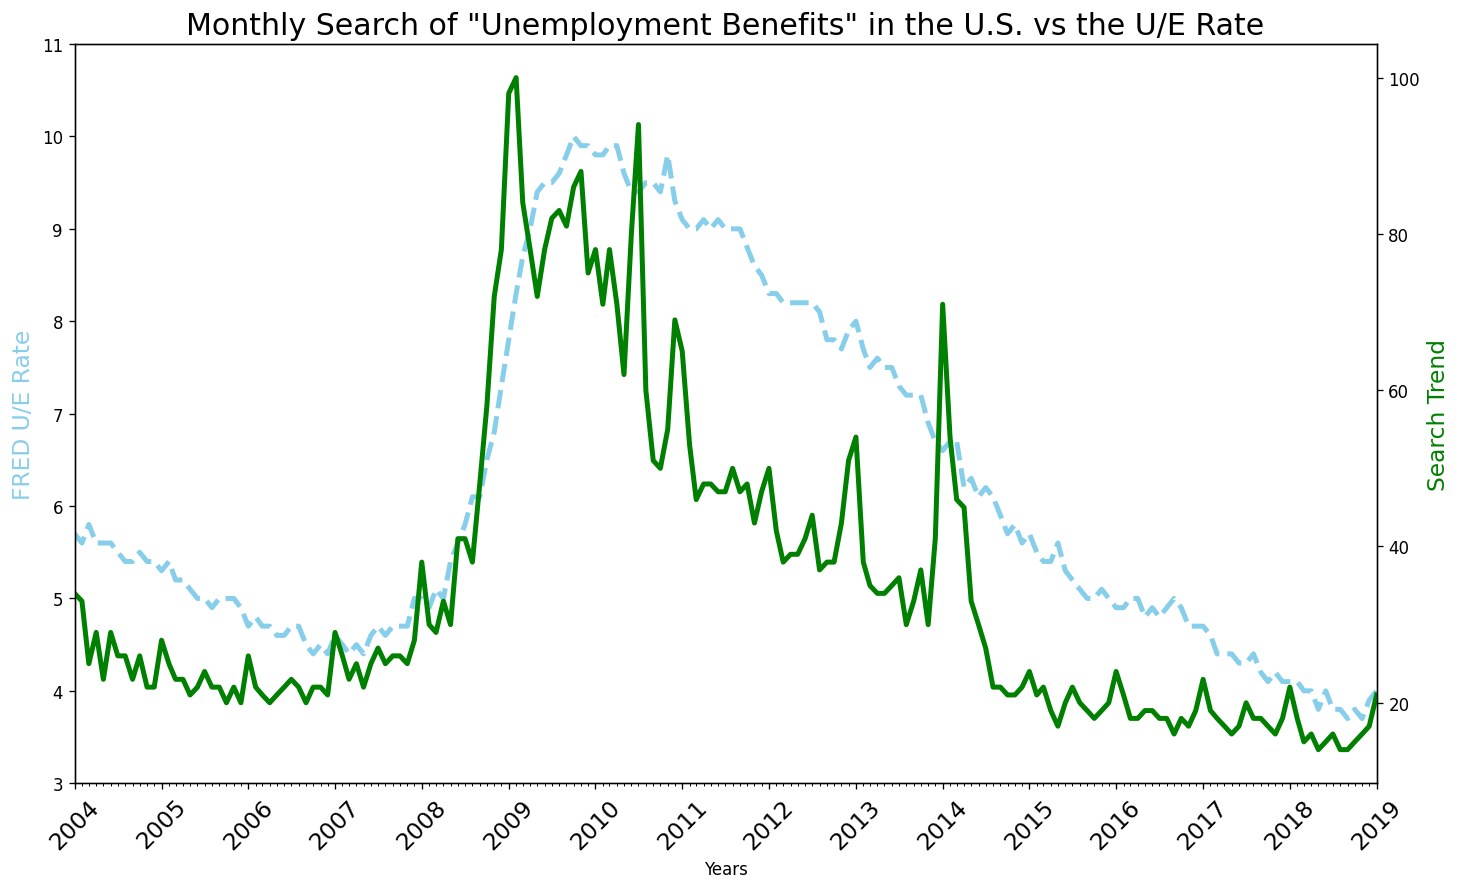

In [110]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='skyblue', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='green', linewidth=3)

ax1.set_ylim([3, 11])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel('FRED U/E Rate', color='skyblue', fontsize=14)
ax2.set_ylabel('Search Trend', color='green', fontsize=14)
ax1.set_xlabel('Years')

#Tick Marks on a Time Line

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

Calculate the rolling average of 3 months of web searches


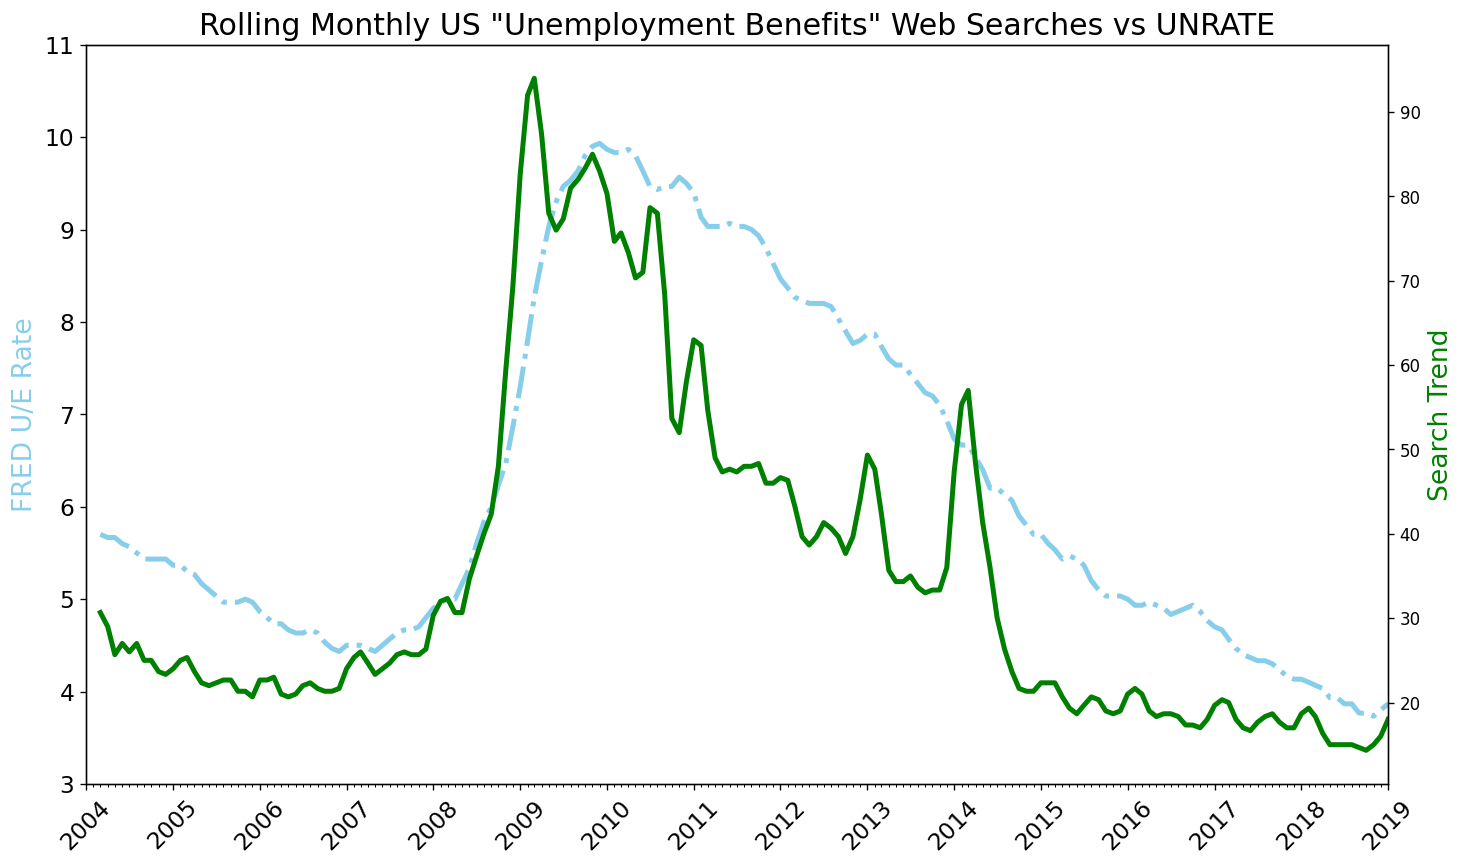

In [114]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='skyblue', fontsize=16)
ax2.set_ylabel('Search Trend', color='green', fontsize=16)
ax1.set_ylim(bottom=3, top=11)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'skyblue', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'green', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

Reading "UE Benefit Lookup vs. UE Rate 2004-20.csv” in DataFrame.
 and plot the graph.

In [121]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.shape
df_ue_2020.columns, df_ue_2020.dtypes

(Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object'),
 MONTH                      object
 UE_BENEFITS_WEB_SEARCH      int64
 UNRATE                    float64
 dtype: object)

Convert the MONTH column to Pandas Datetime objects

In [124]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
type(df_ue_2020.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

2020 affects

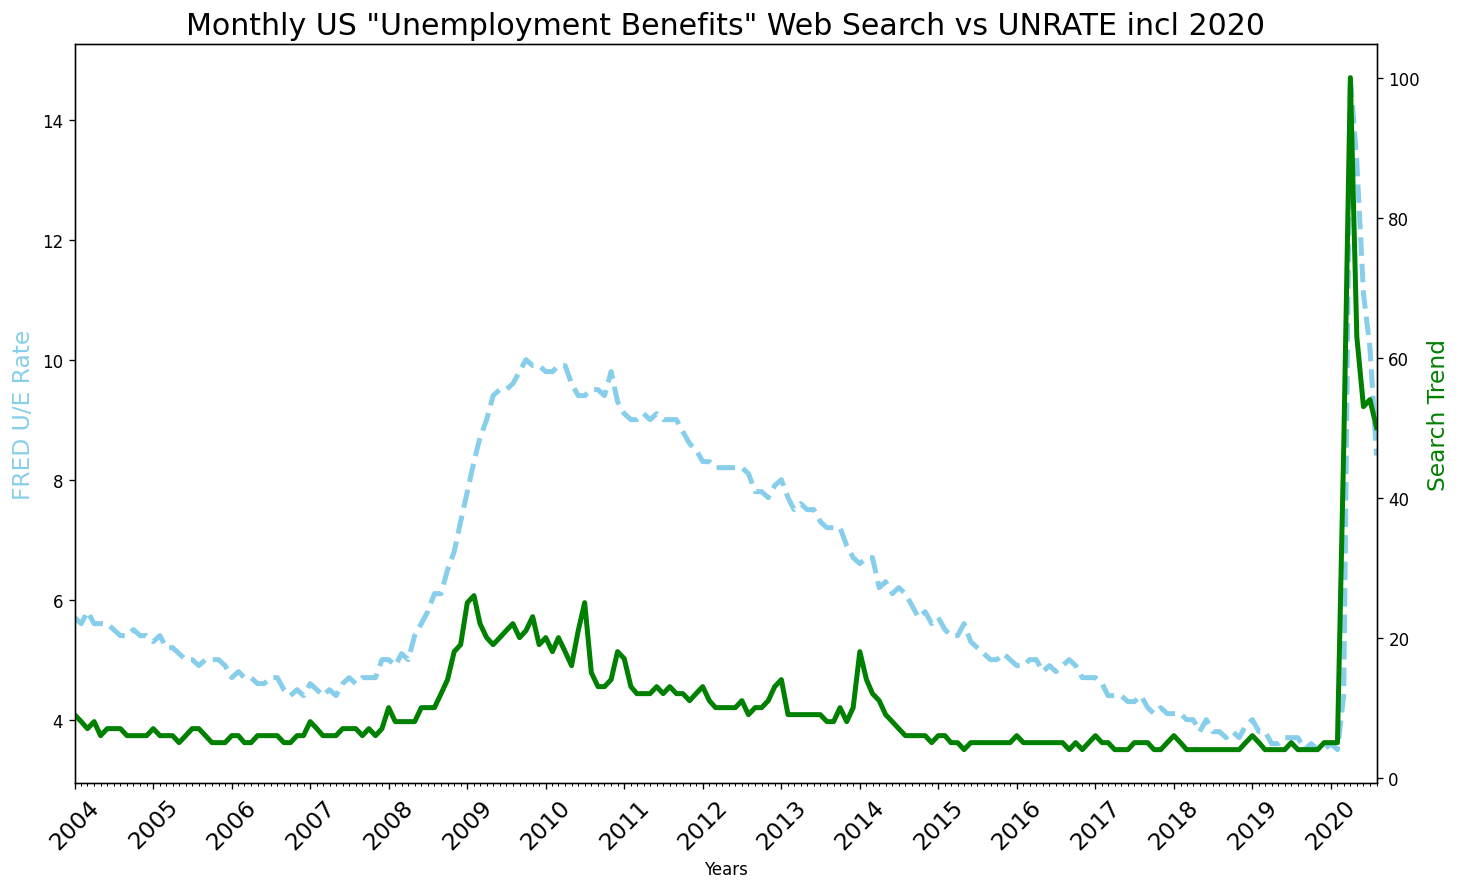

In [133]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color='skyblue', linewidth=3, linestyle='--')
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color='green', linewidth=3)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.set_ylabel('FRED U/E Rate', color='skyblue', fontsize=14)
ax2.set_ylabel('Search Trend', color='green', fontsize=14)
ax1.set_xlabel('Years')

#Tick Marks on a Time Line

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()